### Загружаем первый датасет - юниты из Heroes of Might and Magic III


In [146]:
import pandas as pd
import matplotlib.pyplot as mplp
import seaborn as sn
import sklearn 

H3_file_path = "C:\\Users\\Pankratz\\Desktop\\ML\\Datasets\\H3Units.csv"
H3_data = pd.read_csv(H3_file_path)

In [147]:
H3_data.head()

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
0,Pikeman,Castle,1,4,5,1,3,10,4,14,80,60,0,Immunetojousting
1,Halberdier,Castle,1+,6,5,2,3,10,5,14,115,75,0,Immunetojousting
2,Archer,Castle,2,6,3,2,3,10,4,9,126,100,0,Ranged(12shots)
3,Marksman,Castle,2+,6,3,2,3,10,6,9,184,150,0,"Ranged(24shots),Doubleattack"
4,Griffin,Castle,3,8,8,3,6,25,6,7,351,200,0,"Flying,Tworetaliations"


In [148]:
H3_data.describe()

,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,11.659574,10.843972,11.262411,15.992908,78.085106,7.418440,5.730496,2417.624113,1236.489362
std,6.992680,7.207420,13.339868,16.784132,138.142136,3.466484,4.702400,7908.489944,3403.613560
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,15.000000,10.000000
25%,7.000000,6.000000,2.000000,4.000000,15.000000,5.000000,2.000000,203.000000,150.000000
50%,10.000000,10.000000,6.000000,9.000000,30.000000,7.000000,4.000000,517.000000,350.000000
75%,15.000000,13.000000,15.000000,20.000000,75.000000,9.000000,8.000000,1547.000000,850.000000
max,50.000000,50.000000,70.000000,80.000000,1000.000000,21.000000,25.000000,78845.000000,30000.000000


***Проверим, есть ли колонки с отсутствующими значениями.***

In [149]:
cols_with_missing = [col for col in H3_data.columns
                     if H3_data[col].isnull().any()]
print(cols_with_missing)

[]


***Удалим не интересующие нас атрибуты***

In [150]:
H3_data = H3_data.drop(['Special_abilities', 'Additional_item'], axis = 1)

***Покажем как варьируется параметр "Атака" у различных юнитов 7-го уровня***

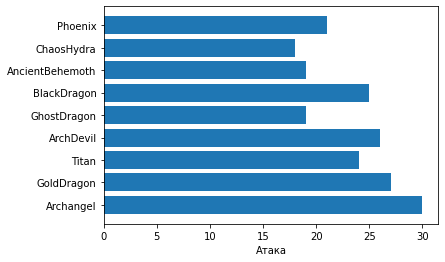

In [151]:
slevels = H3_data[H3_data['Level'] == '7+']
Attack = slevels['Attack'].values.tolist()
Names = slevels['Unit_name'].values.tolist()
mplp.barh(Names, Attack)
mplp.xlabel('Атака')
mplp.show()

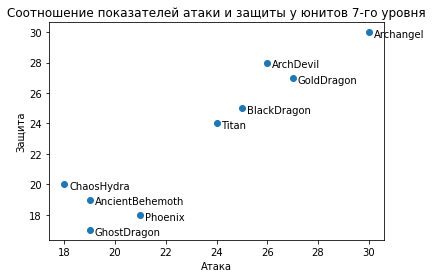

In [152]:
Defence = slevels['Defence'].values.tolist()

mplp.scatter(Attack, Defence)
for label, atk, dfc in zip(Names, Attack, Defence):
    mplp.annotate(label, xy = (atk, dfc), xytext = (5, -5), textcoords = 'offset points')

mplp.title("Соотношение показателей атаки и защиты у юнитов 7-го уровня")
mplp.xlabel("Атака")
mplp.ylabel("Защита")
mplp.show()

***Выберем стоимость в золоте в качестве целевого признака***

И выведем из корелляционной матрицы атрибутов столбец, отвечающий за целевой признак

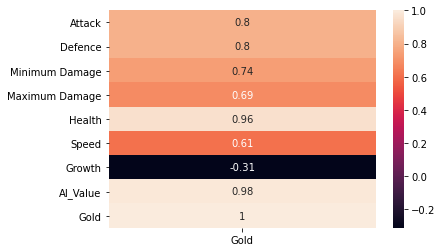

In [153]:
corrMatrix = H3_data.corr()
row = corrMatrix[['Gold']]
sn.heatmap(row, annot=True)
mplp.show()

In [154]:
y = H3_data.Gold
X_values = ['Attack', 'Defence', 'Minimum Damage', 'Maximum Damage', 'Health', 'Speed', 'Growth']
X = H3_data[X_values] #Не берём AI_Value поскольку на языке игры это примерно то же самое, что и стоимость

***Построим простую модель линейной регрессии c L2-регуляризацией для приблизительного выявления зависимости целевого признака от остальных выбранных признаков***

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

H3_model = Ridge() #обычная LinearRegression(), кажется, переобучалась
H3_model.fit(train_X, train_y)
train_predictions = H3_model.predict(train_X)
print("MAE на обучающей выборке: ", mean_absolute_error(train_y, train_predictions))

val_predictions = H3_model.predict(val_X)
print("MAE на тестовой выборке: ", mean_absolute_error(val_y, val_predictions))

print("Среднее значение в колонке 'Gold': ", H3_data.Gold.mean())


MAE на обучающей выборке:  377.55816654757945
MAE на тестовой выборке:  493.1541818326425
Среднее значение в колонке 'Gold':  1236.4893617021276


### Загружаем следующий датасет - треки из Spotify  

In [156]:
import pandas as pd
import matplotlib.pyplot as mplp
import seaborn as sn
import sklearn 

Music_file_path = "C:\\Users\\Pankratz\\Desktop\\ML\\Datasets\\SpotifyFeatures.csv"
Music_data = pd.read_csv(Music_file_path)
Music_data.head()
Music_data.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

***Поставим задачу классификации***

Пусть мы хотим отнести трек к тому или иному жанру (то есть выбираем genre как целевой признак) в зависимости от некоторых других признаков. Нам точно не понадобятся колонки track id, key, artist name и track name (хоть последние две и могли бы быть полезны, они заполнены слишком большим количеством уникальных значений категориальных признаков), но предположим, что нам понадобятся остальные колонки. В таком случае, нам необходимо будет закодировать оставшиеся категориальные признаки, используя One-Hot Encoding. Для колонки genre применим Label Encoding.



In [157]:
from sklearn.preprocessing import StandardScaler

Music_data = Music_data.drop(['track_id', 'artist_name', 'track_name'], axis = 1)
Music_data["popularity"] = Music_data["popularity"].astype(str).astype(float)
Music_data["duration_ms"] = Music_data["duration_ms"].astype(str).astype(float)
scaler = StandardScaler()
s = (Music_data.dtypes == 'float64') 
colsfloat = list(s[s].index)

v = (Music_data.dtypes == 'object') 
colsobject = list(v[v].index)

scaled_data = scaler.fit_transform(Music_data[colsfloat].values)
temp_1 = pd.DataFrame(data = Music_data[colsobject])
scaled_data = pd.DataFrame(data = scaled_data)
temp_2 = scaled_data.join(temp_1)

scaled_Music_data = pd.DataFrame(data = temp_2, index = Music_data.index, columns = Music_data.columns)

Music_data.duration_ms = Music_data.duration_ms / 60000
Music_data.tempo = Music_data.tempo / 100
Music_data.loudness = Music_data.loudness / -10
Music_data.popularity = Music_data.popularity / 100

Music_data.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0.00,0.611,0.389,1.656217,0.910,0.000,C#,0.3460,0.1828,Major,0.0525,1.66969,4/4,0.814
1,Movie,0.01,0.246,0.590,2.289550,0.737,0.000,F#,0.1510,0.5559,Minor,0.0868,1.74003,4/4,0.816
2,Movie,0.03,0.952,0.663,2.837783,0.131,0.000,C,0.1030,1.3879,Minor,0.0362,0.99488,5/4,0.368
3,Movie,0.00,0.703,0.240,2.540450,0.326,0.000,C#,0.0985,1.2178,Major,0.0395,1.71758,4/4,0.227
4,Movie,0.04,0.950,0.331,1.377083,0.225,0.123,F,0.2020,2.1150,Major,0.0456,1.40576,4/4,0.390


In [158]:
cols_with_missing = [col for col in Music_data.columns
                     if Music_data[col].isnull().any()]
print("Колонки с отсутствующими значениями:")
print(cols_with_missing)

s = (Music_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Категориальные переменные:")
print(object_cols)

Колонки с отсутствующими значениями:
[]
Категориальные переменные:
['genre', 'key', 'mode', 'time_signature']


In [159]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
d = label_encoder.fit(Music_data['genre'])
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
d = label_encoder.fit_transform(Music_data['genre'])
temp = {'genre': d}
new_data = pd.DataFrame(data = temp)
Music_data = Music_data.drop(['genre'], axis = 1)
Music_data = pd.concat([new_data, Music_data], axis = 1)

features = ['popularity','acousticness','danceability','duration_ms','energy','instrumentalness',
            'liveness','loudness','mode','speechiness','tempo','valence', 'time_signature']
X = Music_data[features].copy()
y = Music_data.genre
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

one_hot_1 = pd.get_dummies(X_train['mode'])
one_hot_2 = pd.get_dummies(X_train['time_signature'])
one_hot_val_1 = pd.get_dummies(X_valid['mode'])
one_hot_val_2 = pd.get_dummies(X_valid['time_signature'])

X_train = X_train.drop(['mode', 'time_signature'], axis = 1)
X_valid = X_valid.drop(['mode', 'time_signature'], axis = 1)

X_train = X_train.join([one_hot_1, one_hot_2])
X_valid = X_valid.join([one_hot_val_1, one_hot_2])

In [160]:
print(le_name_mapping)
y_train.head()


{'A Capella': 0, 'Alternative': 1, 'Anime': 2, 'Blues': 3, "Children's Music": 4, 'Children’s Music': 5, 'Classical': 6, 'Comedy': 7, 'Country': 8, 'Dance': 9, 'Electronic': 10, 'Folk': 11, 'Hip-Hop': 12, 'Indie': 13, 'Jazz': 14, 'Movie': 15, 'Opera': 16, 'Pop': 17, 'R&B': 18, 'Rap': 19, 'Reggae': 20, 'Reggaeton': 21, 'Rock': 22, 'Ska': 23, 'Soul': 24, 'Soundtrack': 25, 'World': 26}


81486     16
72431      4
181925    15
212906     8
172817     7
Name: genre, dtype: int32

***Проверим, что выбранные нами признаки действительно отличаются для разных музыкальных жанров***

Сравним визуально гистограммы средних значений этих признаков для двух непохожих жанров (на обучающей выборке).

(0.0, 6.0, 0.0, 18.0)

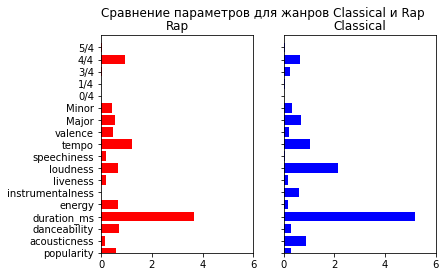

In [161]:
yClas = y_train[y_train == 6]
xClas = X_train.loc[yClas.index].mean()
yRap = y_train[y_train == 19]
xRap = X_train.loc[yRap.index].mean()
cols = list(X_train.columns)

fig, (ax1, ax2) = mplp.subplots(1, 2)
fig.suptitle('Сравнение параметров для жанров Classical и Rap')
ax2.barh(cols, xClas, color = 'blue')
ax1.barh(cols, xRap, color = 'red')
ax2.set_title('Classical')
ax1.set_title('Rap')
ax2.label_outer()
ax2.axis([0, 6, 0, 18])
ax1.axis([0, 6, 0, 18])

***Посмотрим, насколько предикторы кореллируют друг с другом***

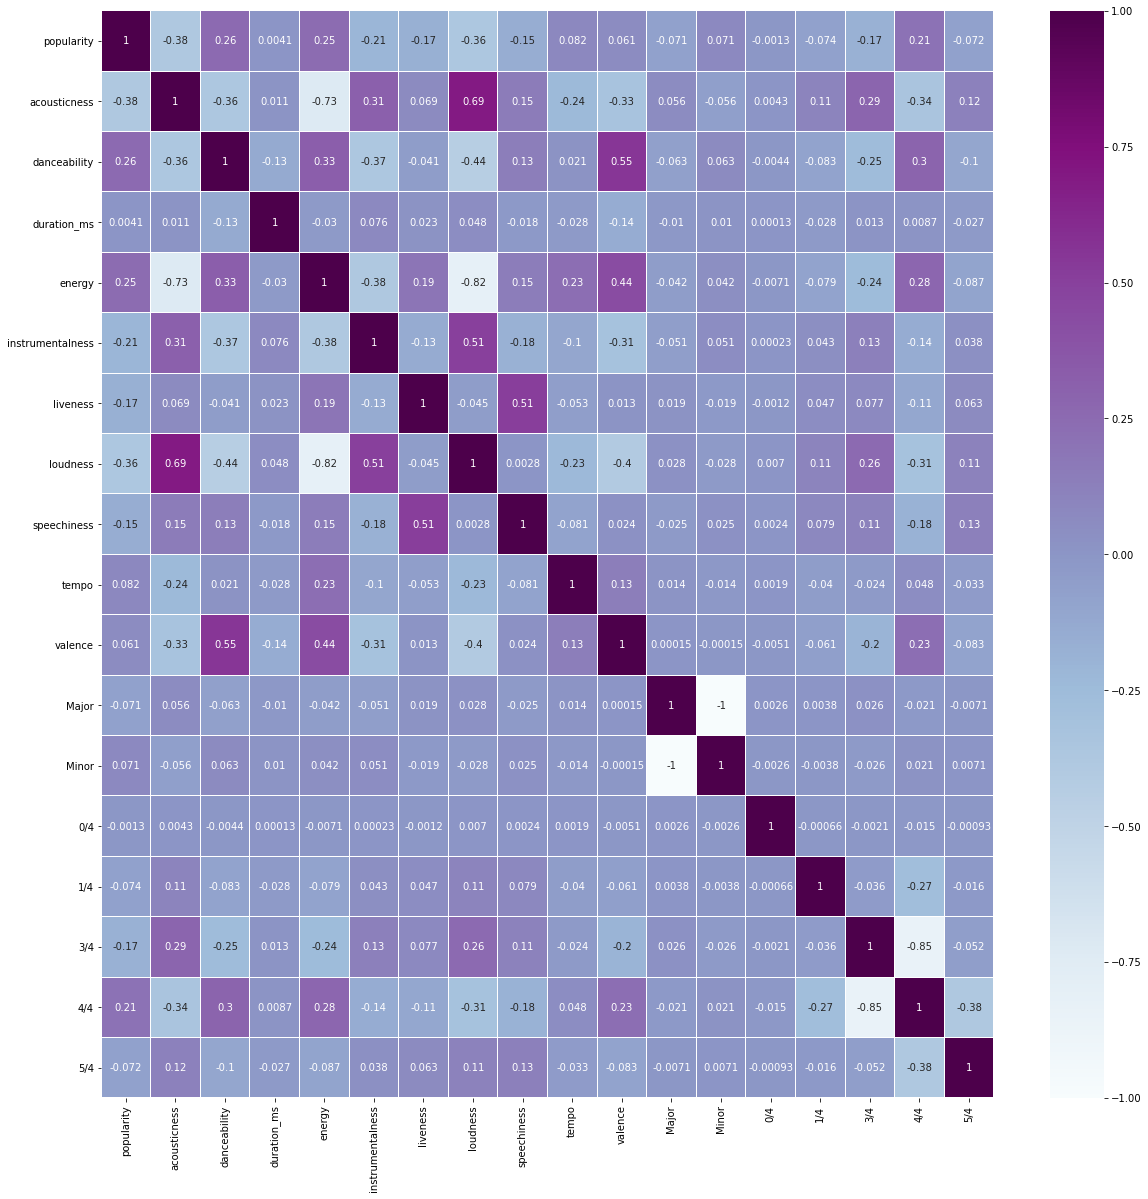

In [162]:
corrMatrix = X_train.corr()
mplp.figure(figsize=(20,20))
sn.heatmap(corrMatrix, linewidths=.1,cmap="BuPu", annot=True)
mplp.yticks(rotation=0);

Данные готовы к решению на них задачи классификации. 

### Приступим к реализации алгоритмов машинного обучения

***Алгоритм логистической регрессии***

Поставим задачу для датасета Heroes_data: с помощью логистической регрессии предскажем, является ли то или иное существо неулучшенным существом первого уровня. Посмотрим, какие параметры кореллируют с этим наиболее сильно и выберем их в качестве предикторов.

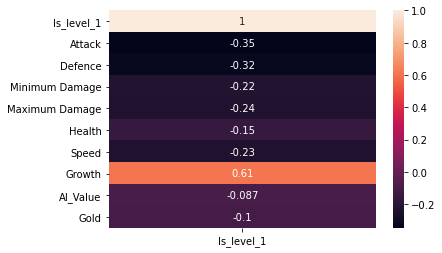

In [496]:
import numpy as np

H3_new = H3_data.copy()
for index, row in H3_new.iterrows():
    if row['Level'] == '1': 
        H3_new.at[index, 'Level'] = 1
    else:
        H3_new.at[index, 'Level'] = 0
H3_new = H3_new.rename(columns={'Level': 'Is_level_1'})
H3_new["Is_level_1"] = H3_new["Is_level_1"].astype(str).astype(int)

corrMatrix = H3_new.corr()
row = corrMatrix[['Is_level_1']]
sn.heatmap(row, annot=True)
mplp.show()


In [497]:
X = H3_new[['Attack','Defence','Maximum Damage','Growth','Speed']]
y = H3_new['Is_level_1']

In [498]:
def sigmoid(x):    
    output = 1 / (1 + np.exp(-x))
    return output

def optimize(x, y,learning_rate,iterations,parameters): 
    size = x.shape[0]
    weight = np.asarray(parameters["weight"], dtype = float)
    bias = np.asarray(parameters["bias"], dtype = float)
    
    for i in range(iterations): 
        sigma = sigmoid(np.dot(x, weight) + bias)
        loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
        dW = np.asarray(1/size * np.dot(x.T, (sigma - y)), dtype = float)
        db = np.asarray(1/size * np.sum(sigma - y), dtype = float)
        weight -= learning_rate * dW
        bias -= learning_rate * db 
    
    parameters["weight"] = weight
    parameters["bias"] = bias
    return parameters

init_parameters = {} 
init_parameters["weight"] = np.zeros(X.shape[1])
init_parameters["bias"] = 0

def train(x, y, learning_rate,iterations):
    parameters_out = optimize(x, y, learning_rate, iterations ,init_parameters)
    return parameters_out

def predict(parameters, x, level):
    out_vals = np.dot(x, parameters["weight"]) + parameters["bias"]
    return sigmoid(out_vals) >= level

Разделим данные на обучающую и тестовую выборку. Затем обучим модель и сгенерируем предсказания. 

In [499]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

parameters_out = train(train_X, train_y, learning_rate = 0.02, iterations = 500)

preds_train = predict(parameters_out, train_X, 0.5)
preds_val = predict(parameters_out, val_X, 0.5)
print("MAE на обучающей выборке (моя модель): ", mean_absolute_error(train_y, preds_train))
print("MAE на тестовой выборке (моя модель): ", mean_absolute_error(val_y, preds_val))


MAE на обучающей выборке:  0.0380952380952381
MAE на тестовой выборке:  0.05555555555555555


In [500]:
indexes = list(val_X.index)
i = 0
for ind in indexes:
    print(ind)
    creature = H3_new.iloc[ind]
    print("Creature:", creature.Unit_name)
    print("Prediction:", preds_val[i])
    print("Right Answer:", creature.Is_level_1 == 1)
    i+=1

45
Creature: Magog
Prediction: False
Right Answer: False
60
Creature: Wight
Prediction: False
Right Answer: False
7
Creature: Crusader
Prediction: False
Right Answer: False
51
Creature: PitLord
Prediction: False
Right Answer: False
66
Creature: BlackKnight
Prediction: False
Right Answer: False
27
Creature: GoldDragon
Prediction: False
Right Answer: False
71
Creature: InfernalTroglodyte
Prediction: False
Right Answer: False
54
Creature: Devil
Prediction: False
Right Answer: False
123
Creature: MagicElemental
Prediction: False
Right Answer: False
8
Creature: Monk
Prediction: False
Right Answer: False
76
Creature: Medusa
Prediction: False
Right Answer: False
16
Creature: Dwarf
Prediction: False
Right Answer: False
125
Creature: Phoenix
Prediction: False
Right Answer: False
122
Creature: PsychicElemental
Prediction: False
Right Answer: False
124
Creature: Firebird
Prediction: False
Right Answer: False
98
Creature: Gnoll
Prediction: False
Right Answer: True
105
Creature: GreaterBasilisk
Pre

Сравнение с LogisticRegression из scikit-learn:

In [502]:
from sklearn.linear_model import LogisticRegression

H3_log_model = LogisticRegression()
H3_log_model.fit(train_X, train_y)
train_predictions = H3_log_model.predict(train_X)
preds_val = H3_log_model.predict(val_X)
print("MAE на обучающей выборке (модель из sklearn): ", mean_absolute_error(train_y, train_predictions))
print("MAE на тестовой выборке (модель из sklearn): ", mean_absolute_error(val_y, preds_val))

MAE на обучающей выборке:  0.01904761904761905
MAE на тестовой выборке:  0.05555555555555555


MAE на обучающей выборке отличаются несущественно, на тестовой - не отличаются совсем.

***Алгоритм K ближайших соседей***

Поставим задачу классификации: пусть наш алгоритм предсказывает, к какому уровню принадлежит то или иное существо.

In [520]:
H3_knn = H3_data.copy()

y = H3_knn.Level
X = H3_knn[['Attack','Defence', 'Minimum Damage', 'Maximum Damage', 'Gold', 'Growth']]
X.head()

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 1)

#scaler = StandardScaler()
#train_X = scaler.fit_transform(train_X)
#val_X = scaler.transform(val_X)

Предусмотрим возможность использования различных метрик

In [521]:
def minkowski_distance(a, b, p=2):
    
    dim = len(a) #количество измерений вектора
    
    distance = 0
    
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

Сам алгоритм приведён ниже. Не предусмотрены "веса" соседей, зависящие от расстояния, берётся просто первая метка из перечисленных Counter'ом.

In [522]:
from collections import Counter

def knn(X_train, X_test, y_train, y_test, k, p):
    X_test = np.asarray(X_test)
    X_train = np.asarray(X_train)
    y_hat_test = []
    for test_point in X_test:
        distances = []
        for train_point in X_train: 
            distances.append(minkowski_distance(test_point, train_point, p))
            
        df_dists = pd.DataFrame(data=distances, columns=['dist'], index=y_train.index) #создаём датасет расстояний
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k] #сортируем его и берём k ближайших точек
        counter = Counter(y_train[df_nn.index]) #Считаем как часто встречается каждая метка ближайших точек
        
        prediction = counter.most_common()[0][0] #берём самую часто встречающуюся метку
        y_hat_test.append(prediction)      
        
    return y_hat_test

Посмотрим, насколько точность предсказания будет зависеть от выбираемого нами k

Text(0.5, 0, 'k = количество ближайших соседей')

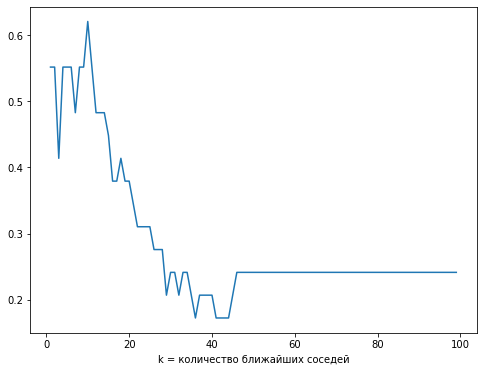

In [171]:
# Получаем accuracy для k от 1 до 99
from sklearn.metrics import accuracy_score
accuracies = []

for k in range(1, 100):
    y_hat_test = knn(train_X, val_X, train_y, val_y, k, p=2)
    accuracies.append(accuracy_score(val_y, y_hat_test))

fig, ax = mplp.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('k = количество ближайших соседей')



In [523]:
predictions_knn = knn(train_X, val_X, train_y, val_y, 10, 2)

val_X = pd.DataFrame(data = val_X)
indexes = list(val_X.index)
i = 0

for ind in indexes:
    creature = H3_knn.iloc[ind]
    print("Creature:", creature.Unit_name)
    print("Prediction:", predictions_knn[i])
    print("Right Answer:", creature.Level)
    i+=1

Creature: Minotaur
Prediction: 5
Right Answer: 5
Creature: WaterElemental
Prediction: 4
Right Answer: 3
Creature: ObsidianGargoyle
Prediction: 2+
Right Answer: 2+
Creature: RoyalGriffin
Prediction: 3+
Right Answer: 3+
Creature: Phoenix
Prediction: 7
Right Answer: 7+
Creature: Magog
Prediction: 3
Right Answer: 2+
Creature: Centaur
Prediction: 1+
Right Answer: 1
Creature: Gog
Prediction: 2
Right Answer: 2
Creature: HarpyHag
Prediction: 3
Right Answer: 2+
Creature: OrcChieftain
Prediction: 3
Right Answer: 3+
Creature: Mummy
Prediction: 4
Right Answer: 3
Creature: EfreetSultan
Prediction: 6+
Right Answer: 6+
Creature: Hobgoblin
Prediction: 1
Right Answer: 1+
Creature: Thunderbird
Prediction: 5+
Right Answer: 5+
Creature: MasterGremlin
Prediction: 1
Right Answer: 1+
Creature: Dwarf
Prediction: 2
Right Answer: 2
Creature: ArchMage
Prediction: 4+
Right Answer: 4+
Creature: Ogre
Prediction: 4
Right Answer: 4
Creature: BlackDragon
Prediction: 7+
Right Answer: 7+
Creature: GrandElf
Prediction: 3

Точность предсказания не слишком высока, но ошибки вполне объяснимы (в том смысле, что для многих ошибок существует действительное объяснение на языке баланса замков самой игры - в рамках одного замка существа одного уровня могут быть сильнее существ аналогичного уровня в других замках, в ущерб своим собратьям, и наоборот). 

In [524]:
from sklearn.neighbors import KNeighborsClassifier 

H3_knn_model = KNeighborsClassifier()
H3_knn_model.fit(train_X, train_y)
sklearn_knn_predictions = H3_knn_model.predict(val_X)
a1 = accuracy_score(val_y, predictions_knn)
a2 = accuracy_score(val_y, sklearn_knn_predictions)
print("Точность моей модели: {0}, точность модели из sklearn: {1} ".format(a1, a2))

Точность моей модели: 0.5172413793103449, точность модели из sklearn: 0.5172413793103449 


Разница в точностях на самом деле зависит от выборки. 

***Метод опорных векторов***

Реализуем машину опорных векторов в виде класса. Поставим задачу классификации существ на "сильных" и "слабых" в зависимости от двух (для удобной визуализации, но вообще можно и больше чем для двух) предикторов-размерностей. Данные будем представлять в виде словаря, так удобнее.

In [173]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
#style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    #обучение
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        # опорные вектора: yi(xi.w+b) = 1
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      #это место ест много производительности
                      self.max_feature_value * 0.001,
                      ]
        b_range_multiple = 2
        #для b не нужно брать так много шагов
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # оптимизируем на выпуклой поверхности
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Оптимизировали (1 шаг)')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=120, marker='o', edgecolors = 'white',
                            c=self.colors[classification])
            #self.ax.annotate(label, xy = (features[0], features[1]),
                             #xytext = (5, -5), textcoords = 'offset points' )
        return classification

    def visualize(self):
        arr_temp = list(train_X.keys())
        [[self.ax.scatter(x[0],x[1],s=80, edgecolors = 'black', 
                          color=self.colors[i]) for x in train_X_final[i]] for i in train_X_final]
        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # гиперплоскость положительного опорного вектора
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # гиперплоскость отрицательного опорного вектора
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        #итоговая гиперплоскость
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        



В следующем не очень разборчивом фрагменте кода я переделываю свои данные под реализацию SVM. Считая средние показатели Attack и Defence, и беря наиболее близкие к ним (как в knn), я делаю эти близкие обучающей выборкой, основываясь на которой строятся опорные вектора и соответствующие им гиперплоскости. Из-за недочёта где-то в той неразберихе кода в реализации SVM мне пришлось сильно ограничить тренировочное множество точек. 

mean attack: 11.659574468085106, mean defence: 10.843971631205674
Оптимизировали (1 шаг)
Оптимизировали (1 шаг)
Оптимизировали (1 шаг)
[12 12] : 1.0079999999969296
[15 15] : 3.0599999999958882
[16 16] : 3.743999999995541
[15 14] : 2.717999999996062
[15 14] : 2.717999999996062
[18 18] : 5.111999999994847
[4 5] : 4.12200000000047
[6 5] : 3.4380000000008164
[6 3] : 4.122000000000469
[6 3] : 4.122000000000469
[8 8] : 1.7280000000016837
[9 9] : 1.0440000000020309


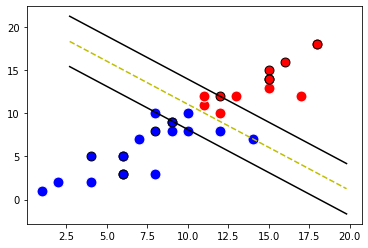

In [174]:
H3_svm = H3_data.copy()
H3_svm.head()

mean_attack = H3_svm.Attack.mean() 
mean_defence = H3_svm.Defence.mean()
print("mean attack: {0}, mean defence: {1}".format(mean_attack, mean_defence))

is_strong = []

for index, row in H3_new.iterrows():
    if row['Attack'] > mean_attack and row['Defence'] > mean_defence: 
        is_strong.append(1)
    else:
        is_strong.append(0)
      
H3_svm = H3_svm[['Unit_name', 'Attack', 'Defence']]
H3_svm.insert(2, 'Is_strong', is_strong, True)

means= [mean_attack, mean_defence]
Dict_temp = H3_svm[['Attack', 'Defence']]
Dict_temp = Dict_temp.to_dict('split')
Dict_temp2 = {i: Dict_temp['data'][i] for i, _ in enumerate(Dict_temp['data'])}

train_split = int(0.8*len(Dict_temp2))
train_X = {j: Dict_temp2[j] for j in range(train_split)}
test_X = {k: Dict_temp2[k] for k in range(train_split, len(Dict_temp2))}

y = (H3_svm[['Is_strong']]).to_dict('split')
y = {i: y['data'][i] for i, _ in enumerate(y['data'])}
train_y = {j: y[j] for j in range(train_split)}
test_y = {k: y[k] for k in range(train_split, len(Dict_temp2))}
train_X_final = {1: [], -1: []}

for i in train_y:
    if H3_svm.iloc[i].Is_strong == 1 and train_X[i][0] < 20 and train_X[i][1] < 20:
        train_X_final[1].append(train_X[i])
    elif H3_svm.iloc[i].Is_strong == 0 and train_X[i][0] < 20 and train_X[i][1] < 20:
        train_X_final[-1].append(train_X[i])
train_X_final[1] = train_X_final[1][0:6]
train_X_final[-1] = train_X_final[-1][0:6]
train_X_final[1] = np.asarray(train_X_final[1])
train_X_final[-1]  = np.asarray(train_X_final[-1])


test_X_final = []
for i in test_y:
    if test_X[i][0] < 20 and test_X[i][1] < 20:
        test_X_final.append(test_X[i])
        
svm = Support_Vector_Machine()
svm.fit(data=train_X_final)

predict_us = test_X_final

for p in predict_us :
    svm.predict(p)

svm.visualize()

Кружки с чёрными окантовками - это точки обучающей выборки, на основе которых строились опорные вектора, кружки чуть большего  размера - точки тестовой. 

***Случайный лес и дерево принятия решений***

В моём случае, дерево принятия решений - класс, метод init которого вызывается из класса случайного леса. Таким образом, в следующих двух блоках кода реализован как алгоритм для единичного дерева, так и для целого леса.

Поставим задачу классификации: пусть дерево принятия решений (как и случайный лес) предсказывает уровень существа по заданным предикторам.

In [369]:
import math
class TreeEnsemble():
    def __init__(self, x, y, n_trees, sample_sz, min_leaf=5): #min_leaf - минимальное количество строк для создания листа
        np.random.seed(42)
        self.x,self.y,self.sample_sz,self.min_leaf = x,y,sample_sz,min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)] #создаём n деревьев

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz] #на случайных строках данных
        return DecisionTree(self.x.iloc[idxs], self.y.iloc[idxs], 
                    idxs=np.array(range(self.sample_sz)), min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0) #среднее из



In [462]:
def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2) #известная формула для дисперсии СВ

class DecisionTree():
    def __init__(self, x, y, idxs, min_leaf=5):
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y.iloc[idxs]) 
        self.score = float('inf') #изначальная энтропия
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0] #все значения <= переменной разбиения уходят в левое поддерево
        rhs = np.nonzero(x>self.split)[0] #все значения >  - в правое
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs]) #рекурсивно строим поддеревья
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs]) 

    def find_better_split(self, var_idx): #поиск разбиения с минимальной энтропией
        x,y = self.x.values[self.idxs,var_idx], self.y.iloc[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y.iloc[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf):
            xi,yi = sort_x[i],sort_y.iloc[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf-1 or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx] 
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self): #на случай если пригодится вывести строковое представление дерева
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi) #тоже рекурсивно

Мне понадобилось написать эту довольно глупо выглядящую функцию для преобразования строк датасета к виду, в котором моя модель могла бы с ним работать (в изначальном датасете параметр 'Level' был строкового типа). При анализе графика и выходных данных с точки зрения реальных данных, стоит иметь в виду что 4 - это на самом деле 2+ и так далее.

In [534]:
def H3_convert(H3_new1):
    for index, row in H3_new1.iterrows():
        if row['Level'] == '1+': 
            H3_new1.at[index, 'Level'] = 2
        if row['Level'] == '2':
            H3_new1.at[index, 'Level'] = 3
        if row['Level'] == '2+': 
            H3_new1.at[index, 'Level'] = 4
        if row['Level'] == '3': 
            H3_new1.at[index, 'Level'] = 5
        if row['Level'] == '3+' or row['Level'] == '3+*': 
            H3_new1.at[index, 'Level'] = 6
        if row['Level'] == '4': 
            H3_new1.at[index, 'Level'] = 7
        if row['Level'] == '4+' or row['Level'] == '4+*': 
            H3_new1.at[index, 'Level'] = 8
        if row['Level'] == '5': 
            H3_new1.at[index, 'Level'] = 9
        if row['Level'] == '5+' or row['Level'] == '5+*': 
            H3_new1.at[index, 'Level'] = 10
        if row['Level'] == '6': 
            H3_new1.at[index, 'Level'] = 11
        if row['Level'] == '6+': 
            H3_new1.at[index, 'Level'] = 12
        if row['Level'] == '7': 
            H3_new1.at[index, 'Level'] = 13
        if row['Level'] == '7+': 
            H3_new1.at[index, 'Level'] = 14
    H3_new1["Level"] = H3_new1["Level"].astype(str).astype(int)
    return H3_new1

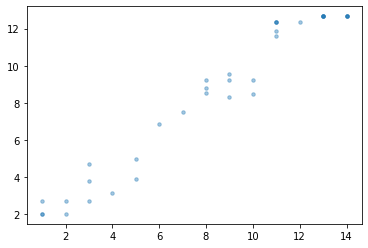

In [535]:
H3_new1 = H3_data.copy()
    
H3_new1 = H3_convert(H3_new1)
#H3_new1.dtypes


X = H3_new1[['Attack','Defence','Minimum Damage','Health','Speed','Growth']]
y = H3_new1['Level']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
#train_X = pd.DataFrame(data = train_X)
#train_y = pd.DataFrame(data = train_y)
ens = TreeEnsemble(train_X, train_y, 5, 30)
preds = ens.predict(val_X.values)
plt.scatter(val_y, preds, alpha=0.4, s=12)

In [542]:
from sklearn.metrics import r2_score
print("R2 моей модели: {0}".format(r2_score(val_y, preds)))

R2 моей модели: 0.9514920386945981


Как видно из графика и r2-метрики, предсказания модели на валидационной выборке очень редко отличаются от истинных значений. Такую высокую точность можно объяснить простотой датасета и его малыми размерами.

In [543]:
from sklearn.ensemble import RandomForestClassifier

H3_RF_model = RandomForestClassifier()
H3_RF_model.fit(train_X, train_y)
sklearn_RF_predictions = H3_RF_model.predict(val_X)

print("R2 модели из sklearn: {0}".format(r2_score(val_y, sklearn_RF_predictions)))

R2 модели из sklearn: 0.9745720458700349


Отдельно: классификация на основе одного дерева принятия решений. 

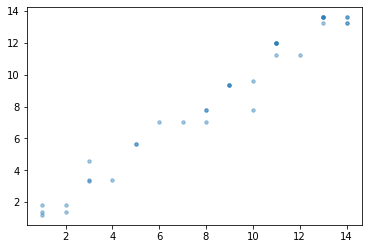

In [525]:
H3_DT = H3_data.copy()
    
H3_DT = H3_convert(H3_DT)
#H3_DT.dtypes

X = H3_DT[['Attack','Defence','Minimum Damage','Health','Speed','Growth']]
y = H3_DT['Level']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
#train_X = pd.DataFrame(data = train_X)
#train_y = pd.DataFrame(data = train_y)
idxs = [i for i in range(len(train_X))]
idxs = np.asarray(idxs)
ens = DecisionTree(train_X, train_y, idxs)
preds = ens.predict(val_X.values)
plt.scatter(val_y, preds, alpha=0.4, s=12)

In [539]:
from sklearn.metrics import r2_score
print("R2 моей модели: {0}".format(r2_score(val_y, preds)))


R2 моей модели: 0.9514920386945981


In [541]:
from sklearn.tree import DecisionTreeClassifier

H3_DT_model = DecisionTreeClassifier()
H3_DT_model.fit(train_X, train_y)
sklearn_DT_predictions = H3_DT_model.predict(val_X)

print("R2 модели из sklearn: {0}".format(r2_score(val_y, sklearn_DT_predictions)))

R2 модели из sklearn: 0.9611101878012298


Обе модели по точности сравнимы с аналогичными из sklearn, вызванными без каких-то особенных аргументов, регуляризаций и тд. Что, впрочем, не делает их реализации хотя бы близко такими же удобными и эффективными.